# ニューラルネットワーク

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from PIL import Image
import pickle

## 活性化関数

### ステップ関数

In [2]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [3]:
def step_function(x):
    y = x > 0
    return y.astype(np.float32)

res = step_function(np.array([1, 0, 2]))
print(res)

[1. 0. 1.]


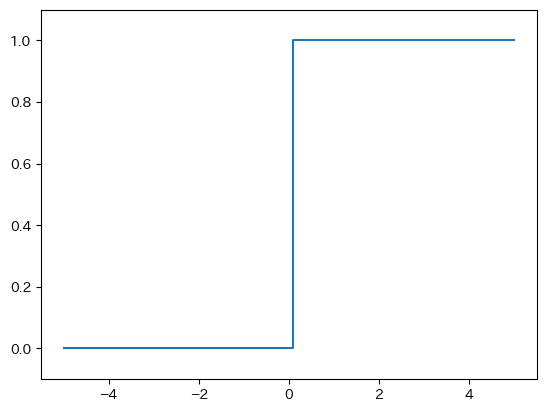

In [4]:
def step_function(x):
    return np.array(x > 0, dtype='float')

x = np.array([-5.0, 5.0, 0.1])
x = np.sort(x)[::-1]

y = step_function(x)

plt.step(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### シグモイド関数

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x) )

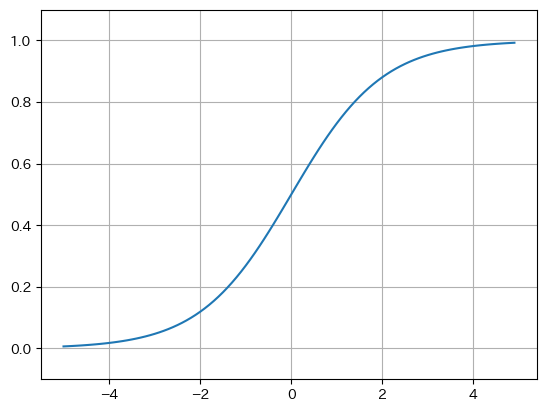

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.grid()
plt.show()

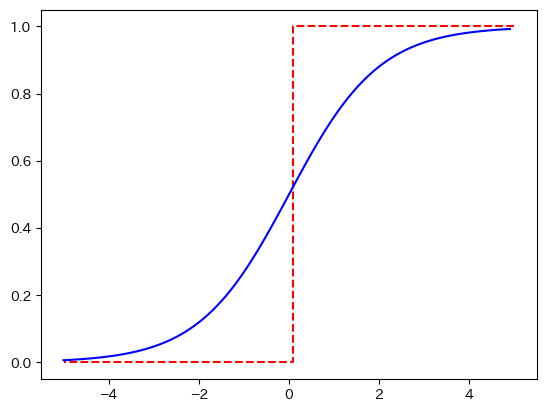

In [7]:
x1 = np.array([-5.0, 5.0, 0.1])
x1 = np.sort(x1)[::-1]
y1 = step_function(x1)

x2 = np.arange(-5.0, 5.0, 0.1)
y2 = sigmoid(x2)

plt.step(x1, y1, '--', c='r')
plt.plot(x2, y2, c='b')
plt.show()

### ReLu関数

In [8]:
def relu(x):
    return np.maximum(0, x) # 0とxを比較し、値が大きい方を返す

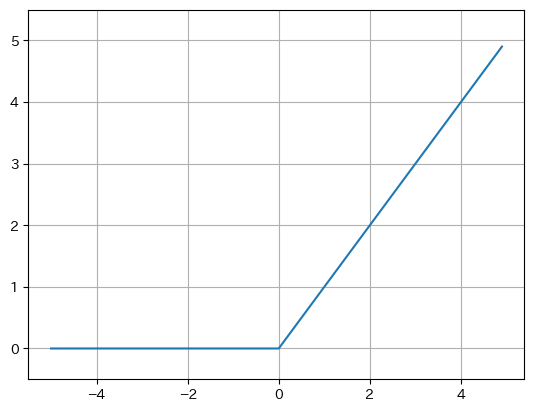

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.grid()
plt.ylim(-0.5, 5.5)
plt.show()

## ニューラルネットワークの内積

In [10]:
x = np.array([1, 2])
B = np.array([
    [1, 3, 5],
    [2, 4, 6]
])

Y = np.dot(x, B)

print(Y)

[ 5 11 17]


## 3層ニューラルネットワークの実装

### 0層から1層における信号伝達の実装

In [11]:
X = np.array([1.0, 0.5]) # ニューロンが持つ値
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 重み
B1 = np.array([0.1, 0.2, 0.3]) # バイアス

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)
print(A1- B1)


(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.2 0.5 0.8]


In [12]:
Z1 = sigmoid(A1) # それぞれの重み付き和を活性化関数に通す
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### 1層から2層における信号伝達の実装

In [13]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


### 2層から出力層における信号伝達の

In [14]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

def identity_function(x):
    """
    出力層の活性化関数
    入力値をそのまま出力する(恒等関数)
    """
    return x

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)


print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


### まとめ

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):
    """出力層の活性化関数。入力値をそのまま出力する(恒等関数)"""
    return x

def init_network():
    """それぞれの層で使用する重みとバイアスを辞書として初期化し、返り値として返す"""
    network = {}
    
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3]) 
    
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([0.1, 0.2])
    
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])
    
    return network

def forward(network, X):
    """
    3層ニューラルネットワークにおける入力から出力方向への伝達処理
    
        隠れ層
            1層目、2層目
        
        出力層
            3層目
    
    引数
    network : 各層における重みとバイスを初期化した辞書
    X       : 入力値(0層におけるニューロンの値)
    
    戻り値
    Y       : 3層ニューラルネットワークに通した結果
    """
    
    A1 = np.dot(X, network["W1"]) + network["b1"] # 重み付き和を計算
    Z1 = sigmoid(A1)                               # 重み付き和をシグモイド関数に通す(第1層のニューロンの値を求める)
    
    A2 = np.dot(Z1, network["W2"]) + network["b2"] # 重み付き和を計算
    Z2 = sigmoid(A2)                               # 重み付き和をシグモイド関数に通す(第2層のニューロンの値を求める)
    
    A3 = np.dot(Z2, network["W3"]) + network["b3"] # 重み付き和を計算
    Y = identity_function(A3)                      # 重み付き和を恒等関数に通す(第3層のニューロンの値を求める)
    
    return Y

network = init_network()
X = np.array([1.0, 0.5])     # 入力値 : 第0層(入力層)のニューロンの値
Y = forward(network, X)

print(f'出力値 { Y }')

出力値 [0.31682708 0.69627909]


## 出力層の設計

### ソフトマックス関数

In [16]:
def softmax(a):
    """
    引数
    a : 出力層の一つ前の層の各ニューロンの値
    
    戻り値
    y : 出力層の各ニューロンの値
    """
    
    exp_a = np.exp(a)               # 各入力値における指数関数の計算
    sum_exp_a = np.sum(exp_a)       # 各入力値における指数関数の計算の合計

    y = exp_a / sum_exp_a           # 出力層における各ニューロンの値を計算
    
    return y

# a = np.array([0.3, 2.9, 4.0])   # 出力層の一つ前の層
# # a = np.array([1010, 1000, 990])   # 出力層の一つ前の層(意図的にオーバーフローを起こすための値)
# y = softmax(a)
# print(y)

**オーバーフロー対策を施したソフトマックス関数**

In [43]:
def softmax(a):
    """
    引数
    a : 出力層の一つ前の層の各ニューロンの値
        
    戻り値
    y : 出力層の各ニューロンの値
    """
    
    C = np.max(a) 
    exp_a = np.exp(a - C)
    sum_exp_a = np.sum(exp_a)
    
    y = exp_a / sum_exp_a
    
    return y

# a = np.array([0.3, 2.9, 4.0])   # 出力層の一つ前の層
a = np.array([1010, 1000, 990])   # 出力層の一つ前の層(意図的にオーバーフローを起こすための値)
y = softmax(a)
print(y)

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


## 手書き数字認識

### MNISTデータセットの取得

In [30]:
import os, sys
sys.path.append(os.pardir) # モジュールを検索するパスを示す文字列のリストに親ディレクトリのパスを追加(datasetディレクトリをインポート可能にするため)
from dataset.mnist import load_mnist

(X_train, t_train), (X_test, t_test) = load_mnist(flatten=True, normalize=False)

# print(sys.path)
print(X_train.shape)
print(t_train.shape)
print(X_test.shape)
print(t_test.shape)    
print(X_train[0].shape)
print(t_test[0])

(60000, 784)
(60000,)
(10000, 784)
(10000,)
(784,)
7


### 画像の表示

5


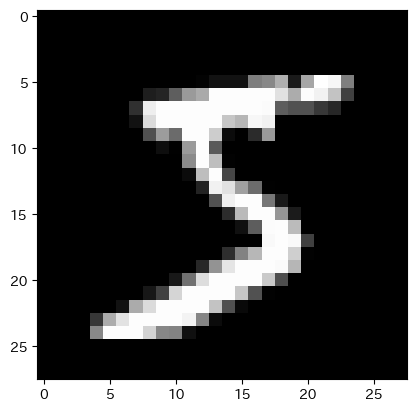

In [40]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(pil_img, cmap="gray")
    
img = X_train[0]
label = t_train[0]
print(label)

img = img.reshape(28, 28)
img_show(img)

### ニューラルネットワークの推論処理

In [51]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    """
    引数
    a : 出力層の一つ前の層の各ニューロンの値
        
    戻り値
    y : 出力層の各ニューロンの値
    """
    
    C = np.max(a) 
    exp_a = np.exp(a - C)
    sum_exp_a = np.sum(exp_a)
    
    y = exp_a / sum_exp_a
    
    return y

def get_data():
    (X_train, t_train), (X_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False)
    
    return X_test, t_test

def init_network():
    """学習済みパラメータの取得
    """
    with open('sample_weight.pkl', "rb") as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    """推論
    """
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    Y = softmax(a3)
    
    return Y

x, t = get_data()           # テストデータとその回答を取得
network = init_network()    # ニューラルネットワークを初期化
accuracy_cnt = 0            # 学習済みパラメータの取得

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    
    if p == t[i]:
        accuracy_cnt += 1

print(f"Accuracy: {float(accuracy_cnt) / len(x)}")
    
    
    

/tmp/ipykernel_11844/3282619324.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.9207


### バッチ処理

In [52]:
x, t = get_data()
network = init_network()
batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]
    y_batch = predict(network, x_batch)                 # (100, 10)のnumpy配列を返す
    p = np.argmax(y_batch, axis=1)                      # 行ごとに最大確率を示すインデックスを取得(,100)のnumpy配列を返す
    accuracy_cnt += np.sum(p == t[i : i + batch_size])  # ブーリアン配列を生成し100個のデータの内、何個正しく予測できたかを計算し、正解数を追加
    
print(f"Accuracy: {float(accuracy_cnt) / len(x)}")

Accuracy: 0.9207


/tmp/ipykernel_11844/3282619324.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
